In [1]:
pip install autolens

In [2]:
import autolens as al
import autolens.plot as aplt

import matplotlib.pyplot as plt

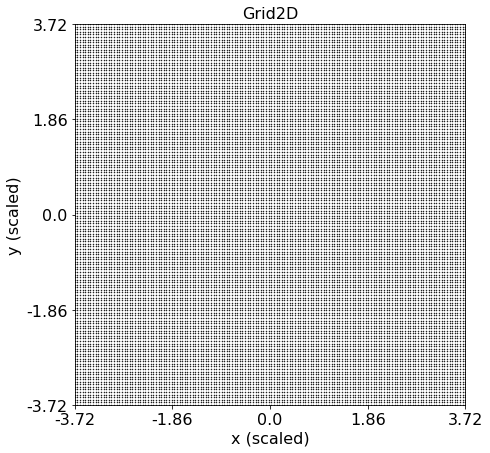

In [3]:
grid = al.Grid2D.uniform(
    shape_native=(150, 150),
    pixel_scales=0.05,  # <- The pixel-scale describes the conversion from pixel units to arc-seconds.
)

grid_plotter = aplt.Grid2DPlotter(grid=grid)
grid_plotter.figure()

In [4]:
N_PROFILES = 5

for i in range(1,N_PROFILES+1):
  vars()[f'light_profile_{i}'] = al.lp.SphericalSersic(centre=(i-1, i-1), intensity=1.0, effective_radius=i, sersic_index=i)
  vars()[f'mass_profile_{i}'] = al.mp.SphericalIsothermal(centre=(i-1, i-1), einstein_radius=i)

galaxy_with_many_profiles = al.Galaxy(
    redshift=0.5,
    light_1=light_profile_1,
    light_2=light_profile_2,
    light_3=light_profile_3,
    light_4=light_profile_4,
    light_5=light_profile_5,
    mass_1=mass_profile_1,
    mass_2=mass_profile_2,
    mass_3=mass_profile_3,
    mass_4=mass_profile_4,
    mass_5=mass_profile_5,
)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


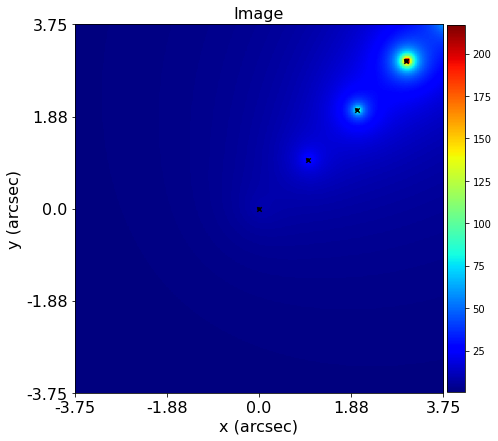

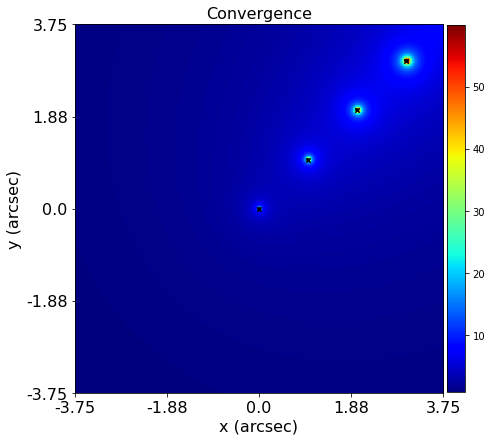

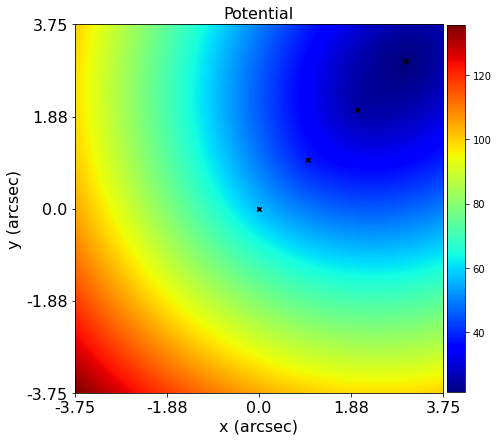

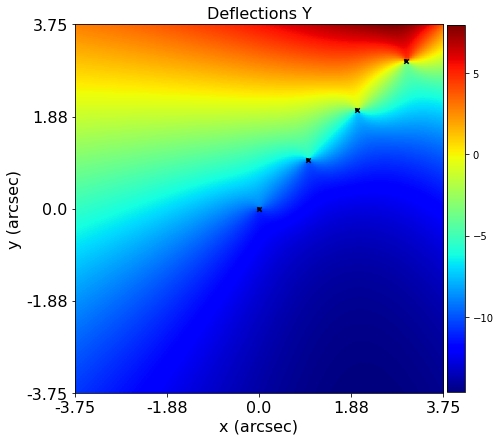

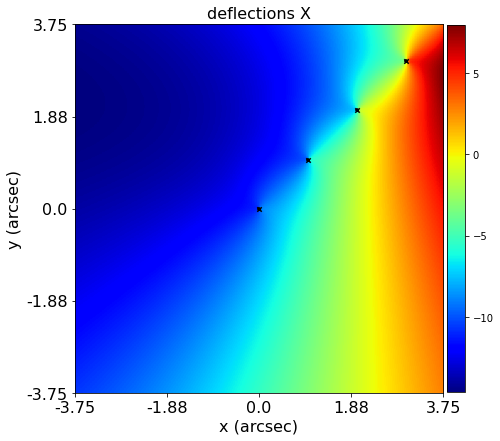

In [5]:
galaxy_plotter = aplt.GalaxyPlotter(galaxy=galaxy_with_many_profiles, grid=grid)
galaxy_plotter.figures(image=True, convergence=True, potential=True, deflections_y=True, deflections_x=True)

In [6]:
tracer = al.Tracer.from_galaxies(galaxies=[galaxy_with_many_profiles])

psf = al.Kernel2D.from_gaussian(shape_native=(11, 11), sigma=0.1, pixel_scales=0.05)

simulator = al.SimulatorImaging(
    exposure_time=300.0, background_sky_level=1.0, psf=psf, add_poisson_noise=True
)

imaging = simulator.from_tracer_and_grid(tracer=tracer, grid=grid)

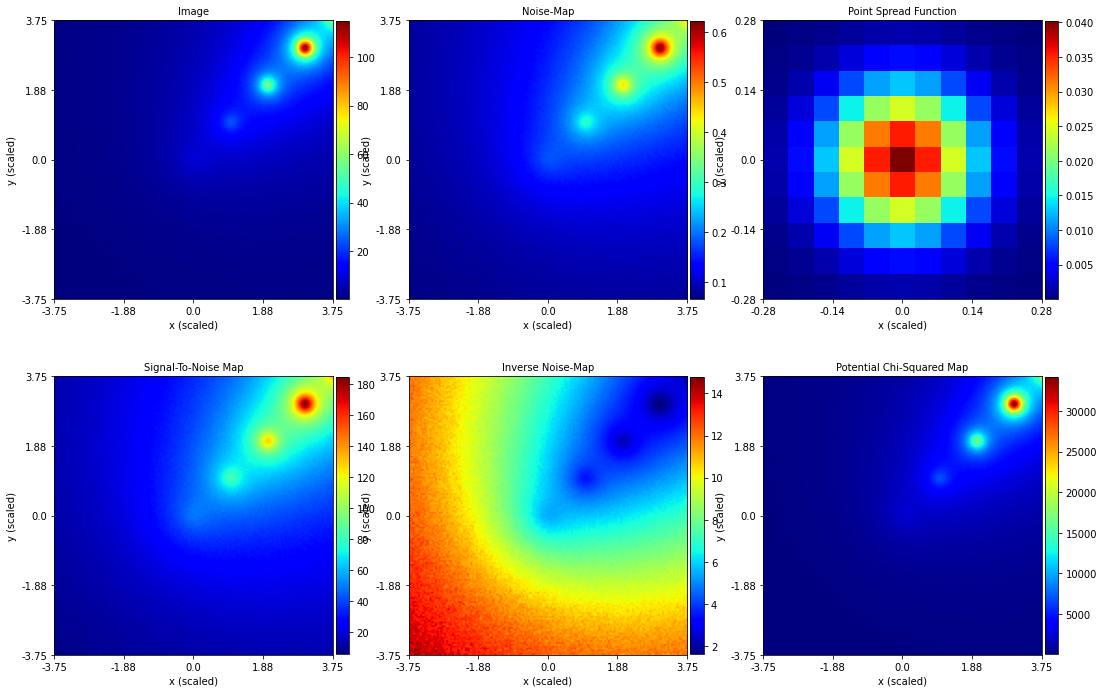

In [7]:
imaging_plotter = aplt.ImagingPlotter(imaging=imaging)
imaging_plotter.subplot_imaging()